In [ ]:
Q1: Key features and their importance in wine quality prediction
The wine quality dataset typically includes the following key features:

Chemical properties:

Fixed acidity: Acidity levels affecting tartness and freshness.
Volatile acidity: Levels of acetic acid, impacting vinegar notes.
Citric acid: Influences sourness and bitterness.
Residual sugar: Amount of unfermented sugar, affecting sweetness.
Chlorides: Levels associated with wine age and quality.
Free and total sulfur dioxide: Antioxidants influencing wine stability.
Density: Reflects alcohol and sugar content.
pH: Measures acidity, impacting taste and stability.
Sulphates: Contribute to mouthfeel and dryness.
Alcohol: Affects body, warmth, and flavor intensity.
Importance of features:

Alcohol: Strongest correlation with quality, often indicating higher richness and complexity.
Acidity: Plays a crucial role in balance and freshness, but high levels can be detrimental.
Residual sugar: Contributes to sweetness and body, but too much can mask other flavors.
pH: Impacts acidity and stability, with balanced ranges preferred.
Other features: Contribute to specific nuances and can be important when analyzed in combination.

In [ ]:
Q2: Handling missing data in wine quality data set
Missing data can be handled through various techniques, each with its advantages and disadvantages:

Mean/median/mode imputation: Simple and computationally efficient but can introduce bias by underestimating variance.
K-nearest neighbors (KNN) imputation: Fills missing values with averages from similar data points, preserving local relationships but sensitive to outliers.
Multivariate imputation by chained equations (MICE): Iteratively imputes missing values using models based on other features, more sophisticated but computationally expensive.
Deletion: Discarding data points with missing values, may lead to bias if missingness isn't random.
Choosing the best technique depends on the data distribution, missingness pattern, and acceptable level of bias.

In [ ]:
Q3: Key factors and analysis of student performance
Factors affecting student performance include:

Individual factors: Intelligence, study habits, motivation, test anxiety.
Socioeconomic factors: Family background, access to resources, neighborhood quality.
Educational factors: Quality of teaching, curriculum, classroom environment.
Psychological factors: Stress, mental health, learning disabilities.
Statistical techniques for analysis:

Correlations: Identify relationships between factors and performance.
Regression analysis: Quantify the influence of individual factors on performance.
ANOVA: Compare performance across groups (e.g., socioeconomic backgrounds).
Factor analysis: Identify underlying dimensions of performance data.
These techniques can help understand complex relationships and predict performance based on various factors.

In [ ]:
For feature engineering, you typically want to create new features or transform existing ones to better represent the underlying patterns in your data.
 Here's an example of feature engineering using Python code with the wine quality dataset. Note that this code is specifically for the wine quality dataset,
  and you might need to adjust it according to the actual structure and characteristics of your student performance dataset:

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the wine quality dataset
wine_data = pd.read_csv('wine.csv')

# Feature engineering for wine dataset

# 1. Creating a new feature for total acidity
wine_data['Total Acidity'] = wine_data['fixed acidity'] + wine_data['volatile acidity']

# 2. Creating a new feature for sweetness level
wine_data['Sweetness'] = np.where(wine_data['residual sugar'] > 5, 'Sweet', 'Dry')

# 3. Scaling numeric features using StandardScaler
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

scaler = StandardScaler()
wine_data[numeric_features] = scaler.fit_transform(wine_data[numeric_features])

# 4. Creating binary indicators for categorical features
wine_data = pd.get_dummies(wine_data, columns=['Sweetness'])

# Display the modified dataset
print(wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol quality  Total Acidity  Sweetness_Dry  Sweet

In [ ]:
Question-5

Exploratory Data Analysis (EDA) involves analyzing and visualizing the data to gain insights into its distribution and characteristics.
Let's perform EDA on the wine quality dataset, identify features with non-normal distributions, and discuss potential transformations to improve normality.

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

<Figure size 1200x800 with 0 Axes>

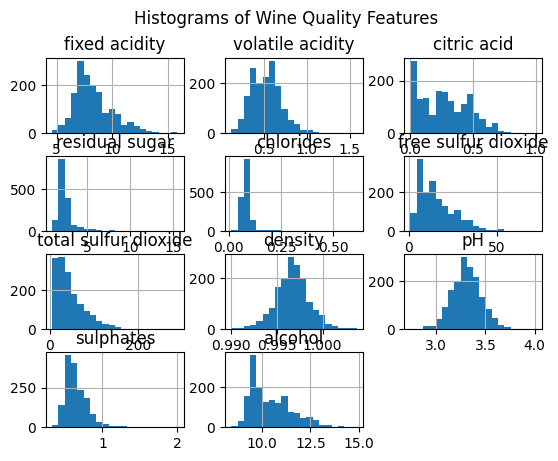

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

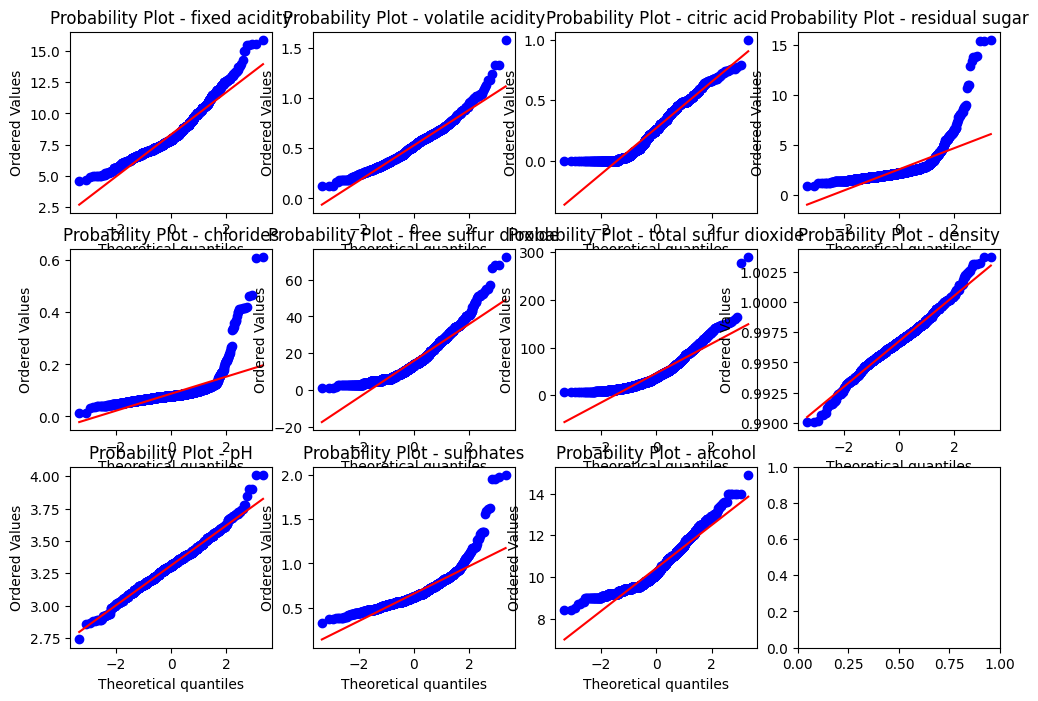

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, yeojohnson, probplot

# Load the wine quality dataset
wine_data = pd.read_csv('wine.csv')

# Display summary statistics
print(wine_data.describe())

# Plot histograms for each feature
plt.figure(figsize=(12, 8))
wine_data.hist(bins=20)
plt.suptitle('Histograms of Wine Quality Features')
plt.show()

# Plot probability plots to check for normality
plt.figure(figsize=(12, 8))
for i, feature in enumerate(wine_data.columns):
    plt.subplot(3, 4, i + 1)
    probplot(wine_data[feature], plot=plt)
    plt.title(f'Probability Plot - {feature}')
plt.tight_layout()
plt.show()

# Check skewness of features
skewness = wine_data.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.5]
print("\nSkewness of Features:\n", skewness)

# Apply Yeo-Johnson transformation to skewed features
skewed_features = skewness.index
for feature in skewed_features:
    wine_data[feature], _ = yeojohnson(wine_data[feature])

# Plot histograms after transformation
plt.figure(figsize=(12, 8))
wine_data.hist(bins=20)
plt.suptitle('Histograms of Wine Quality Features After Yeo-Johnson Transformation')
plt.show()


In [ ]:
Question-6--------------------------------------------------------------------------------------------------------------------

In [ ]:
Certainly! Principal Component Analysis (PCA) is a technique used for dimensionality reduction. It helps identify the most important features
 (principal components) that capture the majority of the variance in the dataset. Here's how you can perform PCA on the wine quality dataset in Python:



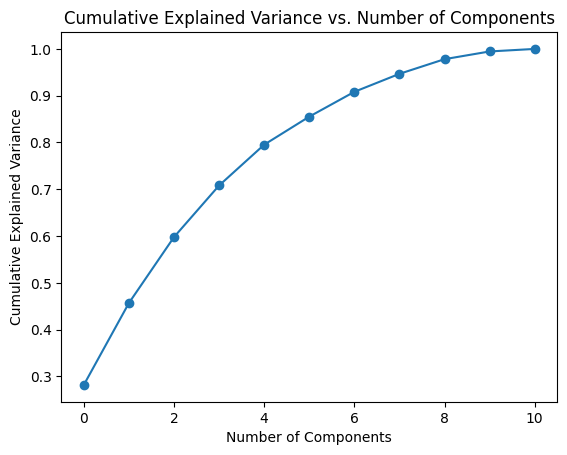


Number of components to explain 90% of the variance: 7


In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the wine quality dataset
wine_data = pd.read_csv('wine.csv')

# Separate features and target variable
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Find the number of components that explain 90% of the variance
num_components_90 = sum(cumulative_explained_variance < 0.9) + 1

# Plot the cumulative explained variance
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

print(f"\nNumber of components to explain 90% of the variance: {num_components_90}")
